In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
hangjungdong_sales = pd.read_csv('C:\TIL\Team project/행정동별_DB.csv')

In [3]:
hangjungdong_sales

,Unnamed: 0,행정동_코드,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,면적 (k㎡),건당_매출액,점포_밀집도
0,0,11110515,2019,1,4675790356,237169,305,2.57,23701.0,118.0
1,1,11110515,2019,2,4826602913,288328,280,2.57,20963.6,109.0
2,2,11110515,2019,3,5054226611,294296,306,2.57,21133.0,119.0
3,3,11110515,2019,4,5259740378,276138,296,2.57,21326.2,116.0
4,4,11110515,2020,1,3831066308,201207,280,2.57,19221.6,109.0
...,...,...,...,...,...,...,...,...,...,...
5996,5996,11740700,2021,3,5268468421,286646,284,1.56,15627.4,182.0
5997,5997,11740700,2021,4,5055977570,246028,267,1.56,16716.6,171.0
5998,5998,11740700,2022,1,4458386133,224449,161,1.56,15356.6,104.0
5999,5999,11740700,2022,2,5527855722,266771,163,1.56,16121.6,105.0


In [4]:
# 4분기 제외 (2022YQ3까지만 있는 관계로 매년 ~Q3 데이터까지만 활용)
hangjungdong_sales.drop(hangjungdong_sales[hangjungdong_sales['기준_분기_코드'] ==4].index)

,Unnamed: 0,행정동_코드,기준_년_코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,점포수,면적 (k㎡),건당_매출액,점포_밀집도
0,0,11110515,2019,1,4675790356,237169,305,2.57,23701.0,118.0
1,1,11110515,2019,2,4826602913,288328,280,2.57,20963.6,109.0
2,2,11110515,2019,3,5054226611,294296,306,2.57,21133.0,119.0
4,4,11110515,2020,1,3831066308,201207,280,2.57,19221.6,109.0
5,5,11110515,2020,2,4730870452,263071,283,2.57,20319.6,110.0
...,...,...,...,...,...,...,...,...,...,...
5995,5995,11740700,2021,2,5516378578,286822,291,1.56,17206.8,186.0
5996,5996,11740700,2021,3,5268468421,286646,284,1.56,15627.4,182.0
5998,5998,11740700,2022,1,4458386133,224449,161,1.56,15356.6,104.0
5999,5999,11740700,2022,2,5527855722,266771,163,1.56,16121.6,105.0


In [5]:
hangjungdong_sales_ = hangjungdong_sales.groupby(['행정동_코드','기준_년_코드']).agg({'분기당_매출_금액':sum, '분기당_매출_건수':sum,'점포수' : np.average, "면적 (k㎡)":max,"점포_밀집도":np.average }).reset_index()

In [6]:
hangjungdong_sales_

,행정동_코드,기준_년_코드,분기당_매출_금액,분기당_매출_건수,점포수,면적 (k㎡),점포_밀집도
0,11110515,2019,19816360258,1095931,296.750000,2.57,115.500000
1,11110515,2020,18089079791,935274,283.000000,2.57,110.000000
2,11110515,2021,25083059412,1297556,285.250000,2.57,111.000000
3,11110515,2022,25734795800,1345940,157.666667,2.57,61.000000
4,11110530,2019,309346012700,13513402,2355.250000,1.23,1914.500000
...,...,...,...,...,...,...,...
1596,11740685,2022,87037961471,4886490,705.333333,1.61,438.000000
1597,11740700,2019,25367953678,1215827,320.750000,1.56,206.000000
1598,11740700,2020,23735340525,1236250,317.500000,1.56,203.500000
1599,11740700,2021,20667046819,1064359,286.500000,1.56,183.250000


In [7]:
for_cluster = hangjungdong_sales_[[ '행정동_코드', '기준_년_코드','분기당_매출_건수', '점포_밀집도']]

In [8]:
for_cluster.rename(columns={'행정동_코드':'code',
                                    '기준_년_코드':'year',
                                    '분기당_매출_건수':'sales cnt',
                                    '점포_밀집도': 'store density'}, inplace=True)

C:\Users\이화정\AppData\Local\Temp\ipykernel_9144\3437285056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_cluster.rename(columns={'행정동_코드':'code',


In [9]:
for_cluster19 = for_cluster[for_cluster['year'] == 2019]
for_cluster20 = for_cluster[for_cluster['year'] == 2020]
for_cluster21 = for_cluster[for_cluster['year'] == 2021]
for_cluster22 = for_cluster[for_cluster['year'] == 2022]

In [10]:
# 데이터 정규화(Min-Max)
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
scaler.fit(for_cluster19[['sales cnt','store density']])
scaler.fit(for_cluster20[['sales cnt','store density']])
scaler.fit(for_cluster21[['sales cnt','store density']])
scaler.fit(for_cluster22[['sales cnt','store density']])

MinMaxScaler()

In [13]:
set_19_sc = scaler.transform(for_cluster19[['sales cnt','store density']])
set_20_sc = scaler.transform(for_cluster20[['sales cnt','store density']])
set_21_sc = scaler.transform(for_cluster21[['sales cnt','store density']])
set_22_sc = scaler.transform(for_cluster22[['sales cnt','store density']])

In [14]:
!pip install yellowbrick

In [15]:
# 적절한 군집수 찾기 1. The Elbow method
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(1, 10))

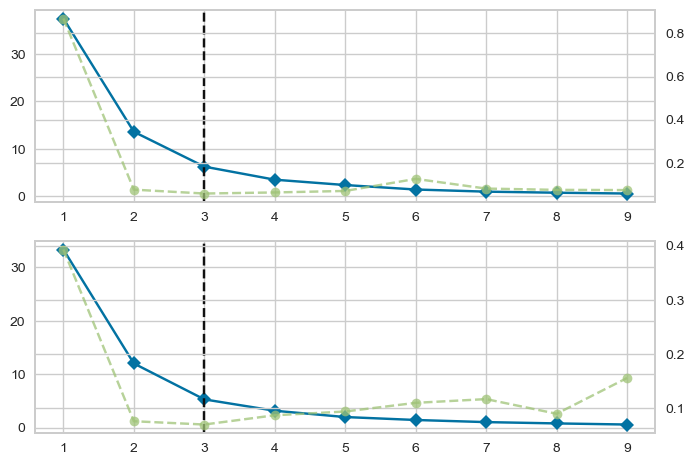

In [16]:
# 2019년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
plt.subplot(2, 1, 1)
visualizer.fit(set_19_sc.reshape(-1,1))

# 2020년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
plt.subplot(2, 1, 2)
visualizer.fit(set_20_sc.reshape(-1,1))

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(1, 10))

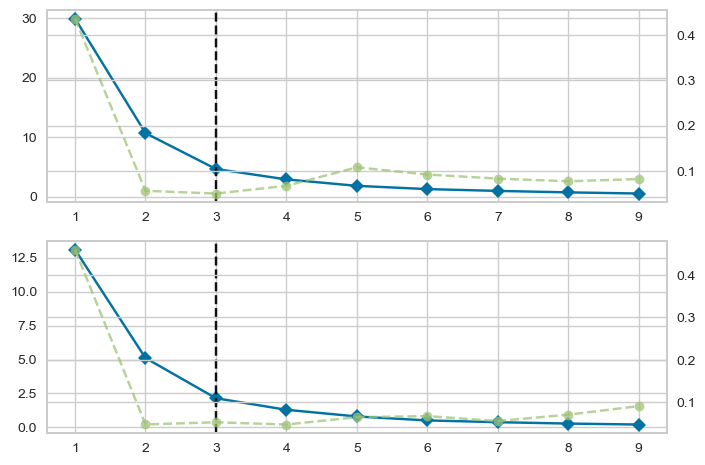

In [17]:
# 2021년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
plt.subplot(2, 1, 1)
visualizer.fit(set_21_sc.reshape(-1,1))

# 2022년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
plt.subplot(2, 1, 2)
visualizer.fit(set_22_sc.reshape(-1,1))

In [18]:
# 적절한 군집수 찾기 2. The Silhouette method
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    # from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

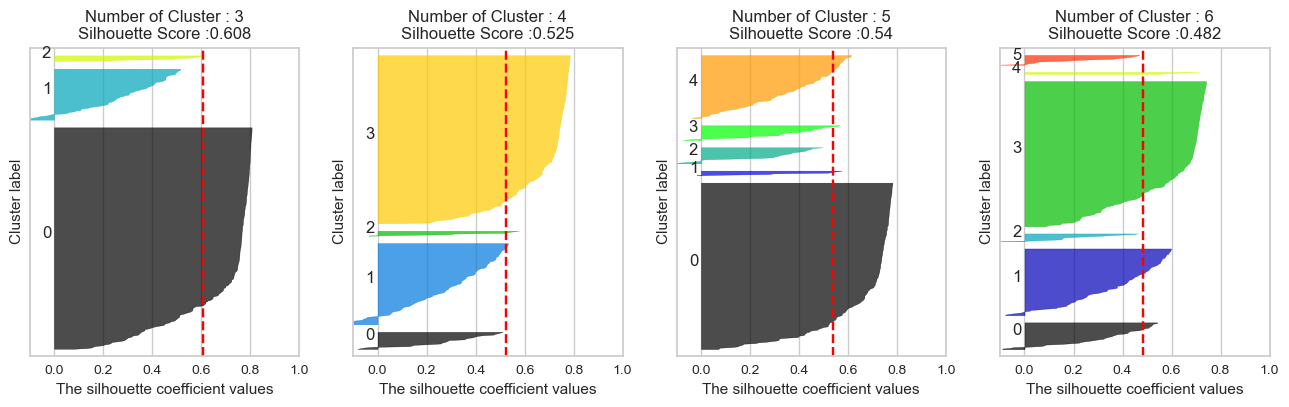

In [19]:
# 2019년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3, 4, 5, 6], set_19_sc)

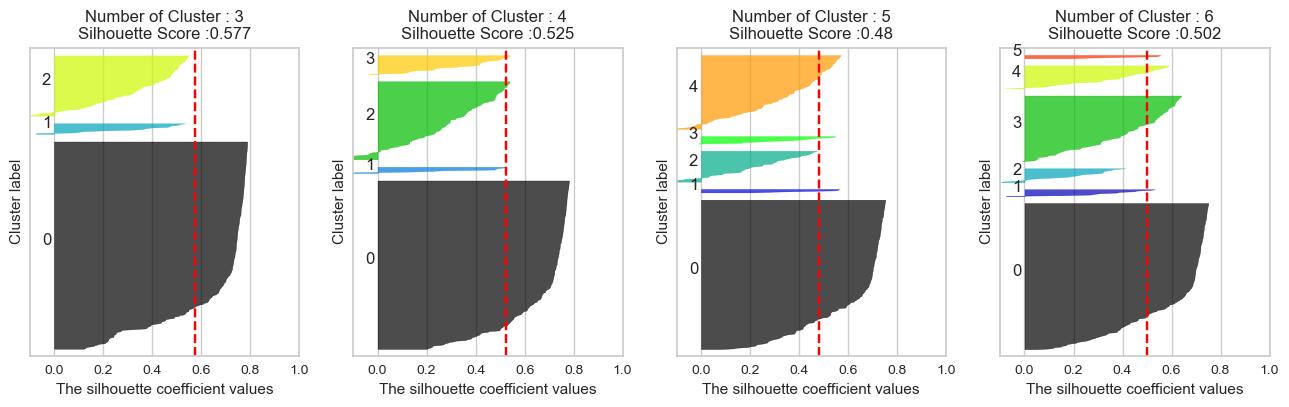

In [20]:
# 2020년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3, 4, 5, 6], set_20_sc)

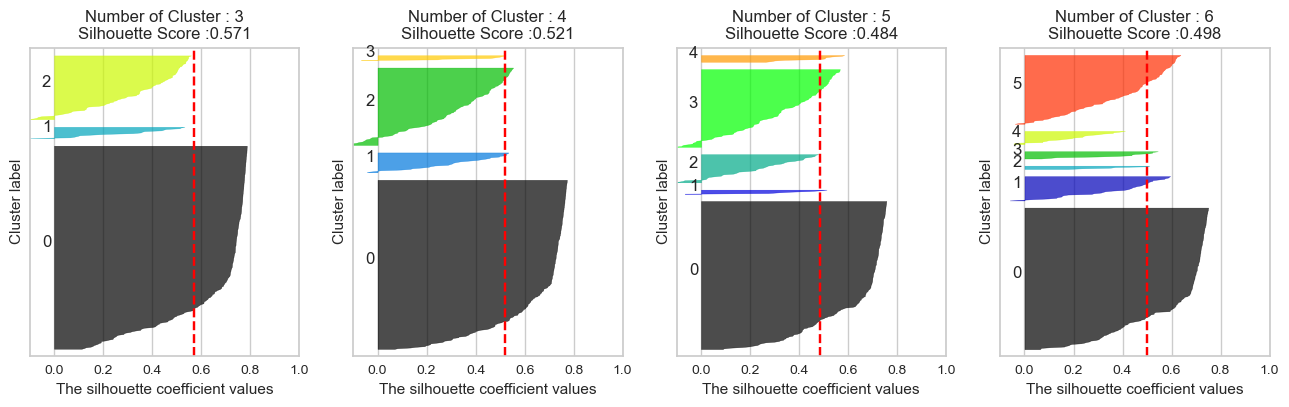

In [21]:
# 2021년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3, 4, 5, 6], set_21_sc)

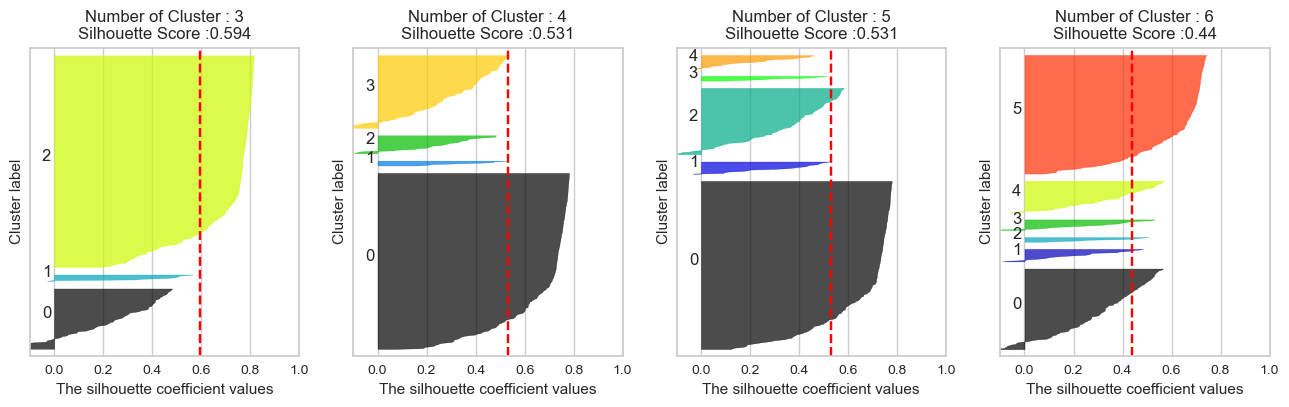

In [22]:
# 2022년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3, 4, 5, 6], set_22_sc)

In [23]:
# 군집 수 적용
km19 = KMeans(n_clusters=4, init='k-means++', random_state=119).fit(set_19_sc)
km20 = KMeans(n_clusters=4, init='k-means++', random_state=119).fit(set_20_sc)
km21 = KMeans(n_clusters=4, init='k-means++', random_state=119).fit(set_21_sc)
km22 = KMeans(n_clusters=4, init='k-means++', random_state=119).fit(set_22_sc)

In [24]:
for_cluster19['cluster'] = km19.predict(set_19_sc)
for_cluster20['cluster'] = km20.predict(set_20_sc)
for_cluster21['cluster'] = km22.predict(set_21_sc)
for_cluster22['cluster'] = km22.predict(set_22_sc)

C:\Users\이화정\AppData\Local\Temp\ipykernel_9144\268568640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_cluster19['cluster'] = km19.predict(set_19_sc)
C:\Users\이화정\AppData\Local\Temp\ipykernel_9144\268568640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_cluster20['cluster'] = km20.predict(set_20_sc)
C:\Users\이화정\AppData\Local\Temp\ipykernel_9144\268568640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [25]:
c_19 = for_cluster19.drop(['year', 'code'], axis=1)
c_20 = for_cluster20.drop(['year', 'code'], axis=1)
c_21 = for_cluster21.drop(['year', 'code'], axis=1)
c_22 = for_cluster22.drop(['year', 'code'], axis=1)

In [32]:
print(c_19.describe())
for_cluster19.groupby(by='cluster')['sales cnt', 'store density'].describe().T

          sales cnt  store density     cluster
count  4.010000e+02     401.000000  401.000000
mean   3.467719e+06     526.234206    0.812968
std    5.885697e+06     568.473819    1.068846
min    1.120000e+02       1.250000    0.000000
25%    6.804820e+05     165.250000    0.000000
50%    1.482208e+06     353.750000    0.000000
75%    3.640617e+06     680.250000    2.000000
max    4.465774e+07    3961.750000    3.000000


C:\Users\이화정\AppData\Local\Temp\ipykernel_9144\3288049301.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for_cluster19.groupby(by='cluster')['sales cnt', 'store density'].describe().T


cluster                         0             1             2             3
sales cnt     count  2.470000e+02  8.000000e+00  1.200000e+02  2.600000e+01
              mean   1.152066e+06  3.409694e+07  4.241845e+06  1.246916e+07
              std    1.180007e+06  9.694605e+06  3.044301e+06  5.459015e+06
              min    1.120000e+02  1.817058e+07  5.469530e+05  3.800424e+06
              25%    4.397025e+05  2.758746e+07  1.942604e+06  8.148885e+06
              50%    8.536540e+05  3.475072e+07  3.498310e+06  1.179893e+07
              75%    1.469953e+06  4.244116e+07  5.598250e+06  1.587071e+07
              max    9.457667e+06  4.465774e+07  1.628126e+07  2.437575e+07
store density count  2.470000e+02  8.000000e+00  1.200000e+02  2.600000e+01
              mean   2.191798e+02  2.906500e+03  7.674625e+02  1.597500e+03
              std    1.414899e+02  7.544035e+02  2.665000e+02  5.087566e+02
              min    1.250000e+00  1.640750e+03  1.367500e+02  3.595000e+02
              25%    9.450000e+01  2.563688e+03  5.811875e+02  1.340625e+03
              50%    2.102500e+02  2.733000e+03  7.237500e+02  1.565125e+03
              75%    3.271250e+02  3.380438e+03  9.316250e+02  1.906000e+03
              max    5.472500e+02  3.961750e+03  1.549500e+03  2.676000e+03

<AxesSubplot:xlabel='store density', ylabel='sales cnt'>

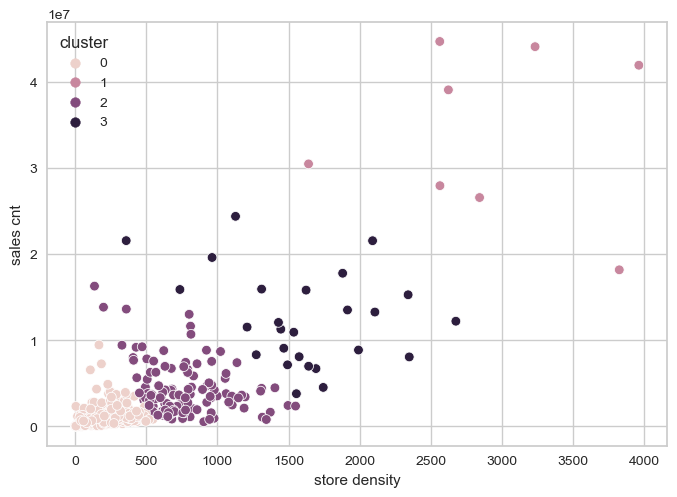

In [26]:
# (x, y) = (건당 매출 금액, 점포 밀집도) 시각화 
# 2019년
sns.scatterplot(x='store density', y='sales cnt', hue='cluster', data=c_19)

<AxesSubplot:xlabel='store density', ylabel='sales cnt'>

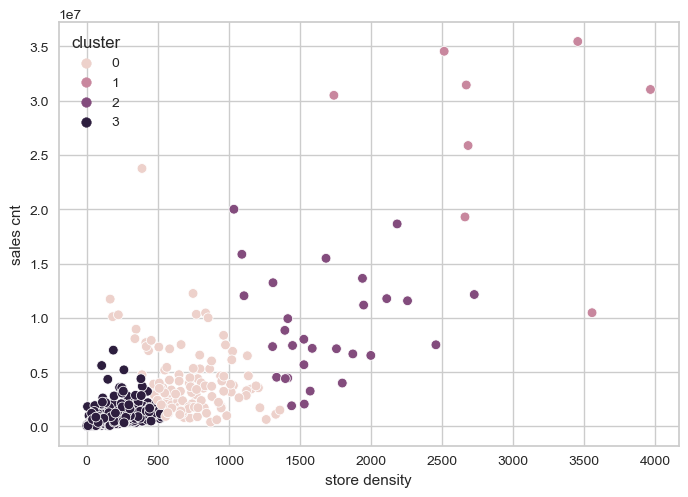

In [27]:
# (x, y) = (건당 매출 금액, 점포 밀집도) 시각화 
# 2020년
sns.scatterplot(x='store density', y='sales cnt', hue='cluster', data=c_20)

<AxesSubplot:xlabel='store density', ylabel='sales cnt'>

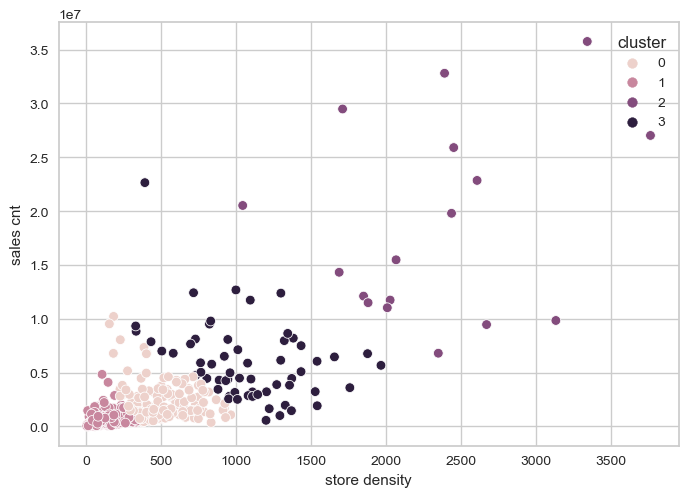

In [28]:
# (x, y) = (건당 매출 금액, 점포 밀집도) 시각화 
# 2021년
sns.scatterplot(x='store density', y='sales cnt', hue='cluster', data=c_21)

<AxesSubplot:xlabel='store density', ylabel='sales cnt'>

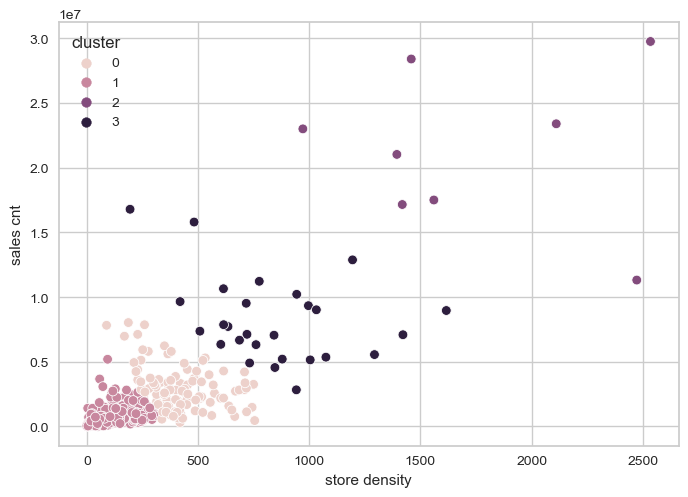

In [29]:
# (x, y) = (건당 매출 금액, 점포 밀집도) 시각화 
# 2022년
sns.scatterplot(x='store density', y='sales cnt', hue='cluster', data=c_22)

In [30]:
print(f'2019년도 군집:\n', c_19['cluster'].value_counts())
print(f'\n2020년도 군집:\n', c_20['cluster'].value_counts())
print(f'\n2021년도 군집:\n', c_21['cluster'].value_counts())
print(f'\n2022년도 군집:\n', c_22['cluster'].value_counts())

2019년도 군집:
 0    247
2    120
3     26
1      8
Name: cluster, dtype: int64

2020년도 군집:
 3    247
0    116
2     29
1      8
Name: cluster, dtype: int64

2021년도 군집:
 1    168
0    155
3     60
2     17
Name: cluster, dtype: int64

2022년도 군집:
 1    258
0    107
3     27
2      8
Name: cluster, dtype: int64
